In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

iris = pd.read_csv(r"C:\Users\ulichtenbaum\Documents\Fundamentos_de_informatica\Fundamentos_de_informatica-master\Fundamentos_de_informatica\Ciencia_de_datos\iris_data.txt", sep = '\t')

In [8]:
# Desafio 1: Averiguá qué variables (columnas) tiene la tabla e inspecioná el DataFrame
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


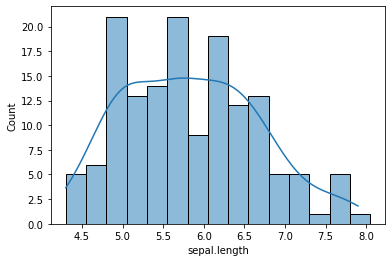

In [9]:
#grafico de distribucion de frecuencias
g = sns.histplot(data = iris, x = "sepal.length", binwidth=0.25, kde = True)
plt.show()

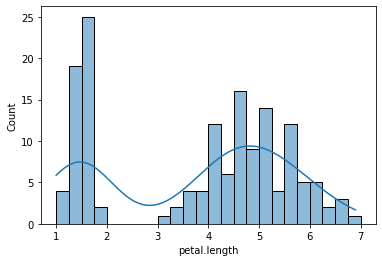

In [11]:
# Desafio 2: Grafica la distribución de frecuencias de la variable "petal.length" ¿Qué información obtenes del gráfico? 
# ¿Qué diferencias notás respecto del observado para la variable sepal.length?
petal_length = sns.histplot(data = iris, x = "petal.length", binwidth=0.25, kde = True)
plt.show()
# muestra la distribucion de la longitud de los petalos, donde podemos observar dos grupos en la distribucion
# sepal.lenght se acerca mas a una distribucion normal

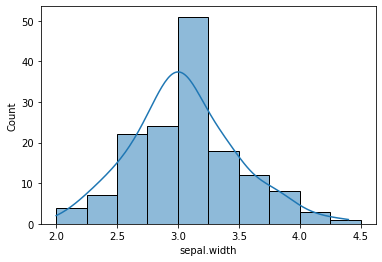

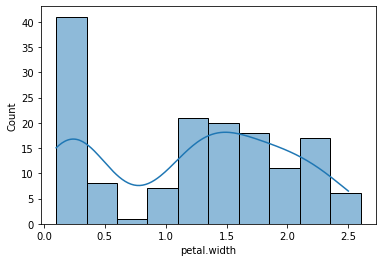

In [12]:
# Desafío III: Grafica la distribución de frecuencias del resto de las variables.
sepal_width = sns.histplot(data = iris, x = "sepal.width", binwidth=0.25, kde = True)
plt.show()
petal_width = sns.histplot(data = iris, x = "petal.width", binwidth=0.25, kde = True)
plt.show()

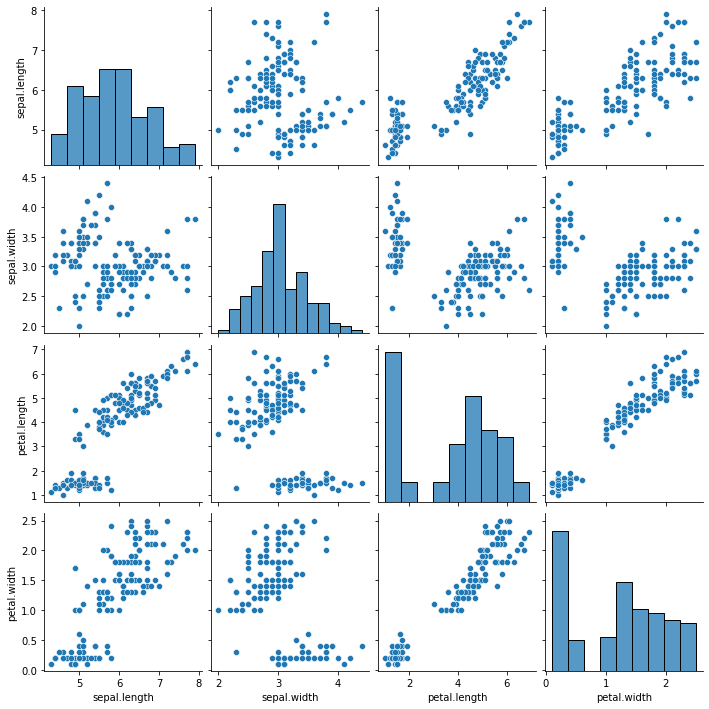

In [13]:
#correlacion entre todas las variables
grafico_correlacion = sns.pairplot(iris)

In [21]:
# Desafío IV: ¿Existe alguna correlación entre algunas de las variables? ¿Cómo te diste cuenta?
# hay dos poblaciones de datos --> se ven dos grupos en los graficos
# Correlacion: entre petal width y petal length

In [22]:
# Desafío V: Buscá otras formas de calcular la distancia entre las observaciones ¿Qué ventajas o desventajas encontras en cada 
# forma de calcular las distancias?
# Escaleado de datos:  Este procedimiento nos permite asegurarnos de que aún cuando algunas variables toman valores más grandes 
# no se usarán como predictor principal a la hora de clasificar.  La escala es importante para poder especificar que una 
# modificación en una cantidad no es igual a otra modificación en otra. En pocas palabras, escalar los datos le da a todas las 
# características la misma importancia para que ninguna esté dominada por otra.

# Normalización: Esta implica transformar o convertir el conjunto de datos en una distribución normal, de forma que todos datos 
# tenga una varianza del mismo orden. De este modo, cada dato nos dará una idea de a cuántos desvíos de la media está ese punto.

In [14]:
#escaleado y normalizacion
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)

In [29]:
# clustering - agrupar datos // metodo Kmeans
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 2  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=2, random_state=123457)

In [16]:
print(kmeans.labels_)  #etiqueta que le puso a cada dato

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [17]:
#centroides
print(kmeans.cluster_centers_ )

[[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]


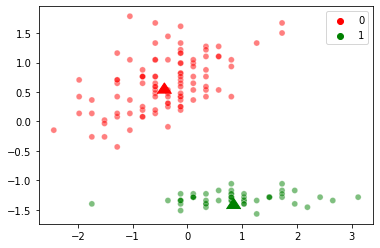

In [18]:
# distribucion de puntos dividida en colores segun al etiqueta
import seaborn as sns
colores = ["red", "green"]
g = sns.scatterplot(x = iris_escaleado[:,1], y = iris_escaleado[:, 2], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,2], zorder = 10, palette = colores, hue = [0, 1], legend = False, marker=6, s=200)
# estoy comparando la segunda y tercer columna. Lo elijo con [:,1] y [:,2]

In [19]:
print(kmeans.inertia_)

223.73200573676343


In [27]:
# Desafío VI: Calculá la inercia para distintos valores de k, desde 0 a 10, y almacenalos en un DataFrame

In [20]:
inercias = {}
def inercias_por_k(diccionario): 
    for i in range(1,11): 
        kmeans = KMeans(n_clusters = i, init='random', n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(iris_escaleado)
        diccionario[i] = kmeans.inertia_

inercias_por_k(inercias)
inercias

C:\Users\ulichtenbaum\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{1: 600.0000000000003,
 2: 223.73200573676343,
 3: 140.96837895511072,
 4: 114.42970777082239,
 5: 91.1543680779766,
 6: 82.00448142316836,
 7: 72.65522408358464,
 8: 63.056244057155475,
 9: 54.960332063567385,
 10: 47.640624864060996}

In [21]:
inercias_por_k(inercias)

C:\Users\ulichtenbaum\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
inercias

{1: 600.0000000000003,
 2: 223.73200573676343,
 3: 140.96837895511072,
 4: 114.42970777082239,
 5: 91.1543680779766,
 6: 82.00448142316836,
 7: 72.65522408358464,
 8: 63.056244057155475,
 9: 54.960332063567385,
 10: 47.640624864060996}

In [23]:
df_inercias = pd.DataFrame(inercias.items(), columns=["k", "inercia"])

In [24]:
df_inercias

,k,inercia
0,1,600.000000
1,2,223.732006
2,3,140.968379
3,4,114.429708
4,5,91.154368
5,6,82.004481
6,7,72.655224
7,8,63.056244
8,9,54.960332
9,10,47.640625


In [28]:
# Desafío VII: Realizá un gráfico de inercia vs k, usando el método pointplot de seaborn

<AxesSubplot:xlabel='k', ylabel='inercia'>

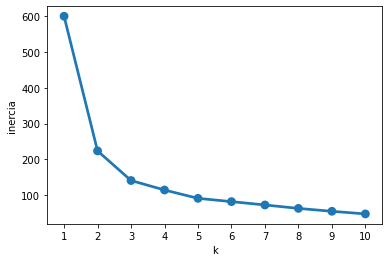

In [25]:
sns.pointplot(data = df_inercias, x = "k", y = "inercia")

In [ ]:
# regla del codo: donde cambia la pendiente mas drasticamente --> esa es la division de los grupos
# mas chica es la inercia, mas confiable es nuestra separacion del grupo --> inercia mas chica = mejor serparacion

In [29]:
# Desafío IX: Calculá la silhouette para distintos valores de k, desde 2 a 10, y almacenalos en un DataFrame

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [27]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

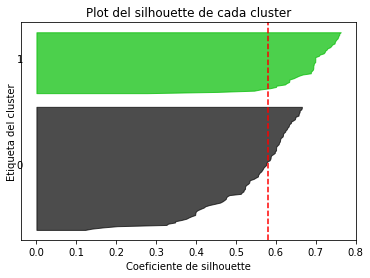

In [28]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg) 

In [ ]:
# los datos cercanos a 1 son mejores, aquellos menores a 0 deben ser eliminados

In [30]:
# Regresion

In [31]:
from scipy import stats

In [32]:
w, p = stats.shapiro(iris["sepal.width"])
# si es mas grande que 0.05 es NORMAL con un X % de confianza

<AxesSubplot:xlabel='sepal.length', ylabel='Count'>

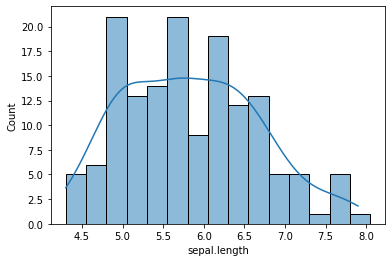

In [33]:
sns.histplot(data=iris, x="sepal.length", binwidth=0.25, kde=True)

In [35]:
iris_escaleado[:,2] # --> por el ,2 me da los datos de la tercer fila. Si solo dejo [:] me da todas las columnas

array([-1.3412724 , -1.3412724 , -1.39813811, -1.2844067 , -1.3412724 ,
       -1.17067529, -1.3412724 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.2844067 , -1.227541  , -1.3412724 , -1.51186952, -1.45500381,
       -1.2844067 , -1.39813811, -1.3412724 , -1.17067529, -1.2844067 ,
       -1.17067529, -1.2844067 , -1.56873522, -1.17067529, -1.05694388,
       -1.227541  , -1.227541  , -1.2844067 , -1.3412724 , -1.227541  ,
       -1.227541  , -1.2844067 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.45500381, -1.39813811, -1.2844067 , -1.39813811, -1.2844067 ,
       -1.39813811, -1.39813811, -1.39813811, -1.227541  , -1.05694388,
       -1.3412724 , -1.227541  , -1.3412724 , -1.2844067 , -1.3412724 ,
        0.53529583,  0.42156442,  0.64902723,  0.1372359 ,  0.47843012,
        0.42156442,  0.53529583, -0.26082403,  0.47843012,  0.08037019,
       -0.14709262,  0.25096731,  0.1372359 ,  0.53529583, -0.09022692,
        0.36469871,  0.42156442,  0.1941016 ,  0.42156442,  0.08